In [ ]:
pip install mysql-connector-python
pip install pandas-profiling

In [ ]:
# Import the necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import mysql.connector
import matplotlib.pyplot as plt
from tabulate import tabulate
from pandas_profiling import ProfileReport

In [ ]:
# Establish a database connection
db = mysql.connector.connect(
    host="+++++++++++",
    port=++++,
    user="scanner_readonly",
    password="========",
    database="++++++"
)

In [ ]:
# Dynamic Parameters
coin_id = 1
timeframe = 5
price_increase_threshold = 1.0  # 1% percent

In [ ]:
# All Logics are here according to your criteria
cursor = db.cursor()
query = f"""
SELECT *
FROM scanner_coinstatshistorical
WHERE coin_id = {coin_id}
  AND timeframe = {timeframe}
ORDER BY time;
"""

cursor.execute(query)

# Initialize variables
previous_price = None
price_increases = []
time_of_increase = []
fetched_records = []

rows = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
if len(rows) == 0:
    print("No records found for coin_id=1 and timeframe=5")
else:
    df = pd.DataFrame(rows, columns=column_names)
    for i in range(len(df) - 1):
        current_row = df.iloc[i]
        next_row = df.iloc[i + 1]
        current_closing_price = current_row['closing_price']
        next_closing_price = next_row['closing_price']
        current_closing_price = float(current_closing_price)
        next_closing_price = float(next_closing_price)
        price_increase = ((next_closing_price - current_closing_price) / current_closing_price) * 100.0
        if price_increase >= price_increase_threshold:
            print(f"Price increase of {price_increase:.2f}% detected at time {current_row['time']}")
            id_to_fetch = current_row['id']
            query = f"""
            SELECT *
            FROM scanner_coinstatshistorical
            WHERE id = {id_to_fetch};
            """
            cursor.execute(query)
            fetched_record = cursor.fetchone()
            price_increases.append(price_increase)
            time_of_increase.append(next_row['time'])
            fetched_records.append(fetched_record)

    price_increase_df = pd.DataFrame({'Price Increase (%)': price_increases, 'Time': time_of_increase})
    fetched_records_df = pd.DataFrame(fetched_records, columns=column_names)

cursor.close()
db.close()

Price increase of 2.36% detected at time 2023-10-03 11:36:23.998678
Price increase of 2.60% detected at time 2023-10-03 11:36:24.196808
Price increase of 1.16% detected at time 2023-10-03 11:37:19.871380
Price increase of 1.01% detected at time 2023-10-06 13:35:53.906473


In [ ]:
# Display the DataFrame with Price Increase (%) and Time
print(price_increase_df)

   Price Increase (%)                       Time
0            2.364207 2023-10-03 11:36:24.096936
1            2.596439 2023-10-03 11:36:24.295846
2            1.159611 2023-10-03 11:37:19.979992
3            1.005651 2023-10-06 13:35:54.293128


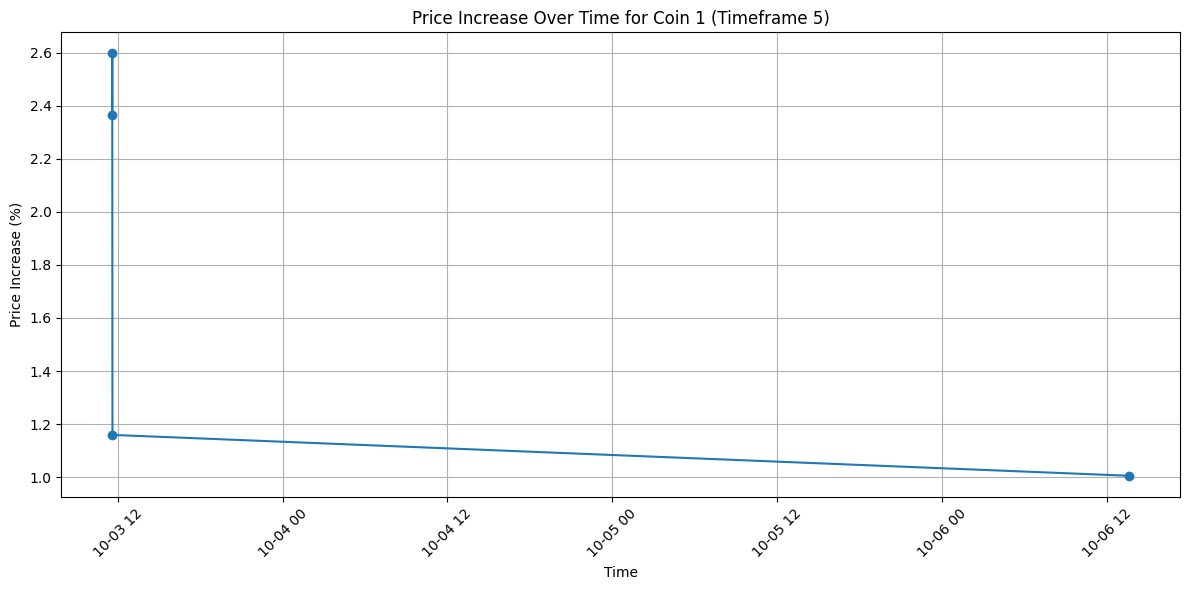

In [ ]:
# Plot the Price Increase (%) over Time
plt.figure(figsize=(12, 6))
plt.plot(price_increase_df['Time'], price_increase_df['Price Increase (%)'], marker='o', linestyle='-')
plt.title(f'Price Increase Over Time for Coin 1 (Timeframe 5)')
plt.xlabel('Time')
plt.ylabel('Price Increase (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Display All Parameters
print(tabulate(fetched_records_df, headers='keys', tablefmt='pretty'))

+---+---------+----------------------------+-----------+------------+-------+----------+----------+-------+-----------+----------+-------------+---------------+----------------+------------+---------------+---------------+---------+
|   |   id    |            time            | timeframe | latest_rsi |  adx  |  volume  |   ema    |  roc  |   beta    |  sma_20  | super_trend | slope_percent |   intercept    | r_squared  | std_deviation | closing_price | coin_id |
+---+---------+----------------------------+-----------+------------+-------+----------+----------+-------+-----------+----------+-------------+---------------+----------------+------------+---------------+---------------+---------+
| 0 |  9709   | 2023-10-03 11:36:23.998678 |     5     |   100.00   | 0.00  | 1647.89  | 27168.60 | 0.00  |           | 27168.60 |  27184.60   |     0E-8      | 27168.60000000 |    0E-8    |     0E-8      | 27214.200000  |    1    |
| 1 |  9713   | 2023-10-03 11:36:24.196808 |     5     |   100.00   

In [ ]:
# Starting
print("Starting:")
print(tabulate(fetched_records_df.head(1), headers='keys', tablefmt='pretty'))
print("\n")

# Ending
print("Ending:")
print(tabulate(fetched_records_df.tail(1), headers='keys', tablefmt='pretty'))


Starting:
+---+------+----------------------------+-----------+------------+------+---------+----------+------+------+----------+-------------+---------------+----------------+-----------+---------------+---------------+---------+
|   |  id  |            time            | timeframe | latest_rsi | adx  | volume  |   ema    | roc  | beta |  sma_20  | super_trend | slope_percent |   intercept    | r_squared | std_deviation | closing_price | coin_id |
+---+------+----------------------------+-----------+------------+------+---------+----------+------+------+----------+-------------+---------------+----------------+-----------+---------------+---------------+---------+
| 0 | 9709 | 2023-10-03 11:36:23.998678 |     5     |   100.00   | 0.00 | 1647.89 | 27168.60 | 0.00 |      | 27168.60 |  27184.60   |     0E-8      | 27168.60000000 |   0E-8    |     0E-8      | 27214.200000  |    1    |
+---+------+----------------------------+-----------+------------+------+---------+----------+------+-----

In [ ]:
# save data in csv
fetched_records_df.to_csv('parameters.csv', index=False)


In [ ]:
profile = ProfileReport(fetched_records_df, explorative=True)
profile.to_widgets()


/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=fetched_records_df['time'], y=fetched_records_df['closing_price'],
                         mode='lines+markers', name='Closing Price',
                         text=fetched_records_df['time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                         customdata=fetched_records_df.drop(columns=['time', 'closing_price', 'id']),
                         hovertemplate='Time: %{text}<br>Closing Price: %{y:.2f}<extra></extra>'))
for col in fetched_records_df.columns:
    if col not in ['time', 'closing_price', 'id']:
        fig.add_trace(go.Scatter(x=fetched_records_df['time'], y=fetched_records_df[col],
                                 mode='markers', name=col,
                                 text=fetched_records_df[col].apply(str),
                                 customdata=fetched_records_df.drop(columns=['time', 'closing_price', 'id']),
                                 hovertemplate='%{x}<br>%{text}<extra></extra>'))

fig.update_layout(title='Line Plot of Closing Price Over Time',
                  xaxis_title='Time', yaxis_title='Closing Price')
fig.show()
